In [1]:
import pandas as pd
from ivpy import attach,show,montage,histogram,scatter

In [3]:
df = pd.read_csv("/mnt/e/Tasks/similarity/src/output/metadata.csv")
DIR = "/mnt/e/Tasks/similarity/Images/Situated-Views-Lowres/" 

In [4]:
attach(df,'path')

# show( )

We saw in Tutorial 0 that show( ), passed without arguments, plots every image in the attached dataframe as a scrolling, rectagular montage. This is useful for getting a quick look at the data, and the default thumbnail size, 100px, is big enough that the user can read scene content in the images. 

Although show( ) is the simplest of the plotting functions, it introduces a set of keyword arguments (kwargs) that are common to all plot types: pathcol, xcol, xdomain, thumb, sample, idx, bg, and ascending.

### pathcol

When we use attach( ), we tell the module where to look for image paths, but we can override this behavior using 'pathcol'. The show( ) function will plot whatever sequence of image paths you assign to 'pathcol'. In fact, you can even pass a single integer, and show( ) will plot the image with that index in the attached dataframe. In this case, the image is displayed at full size by default.

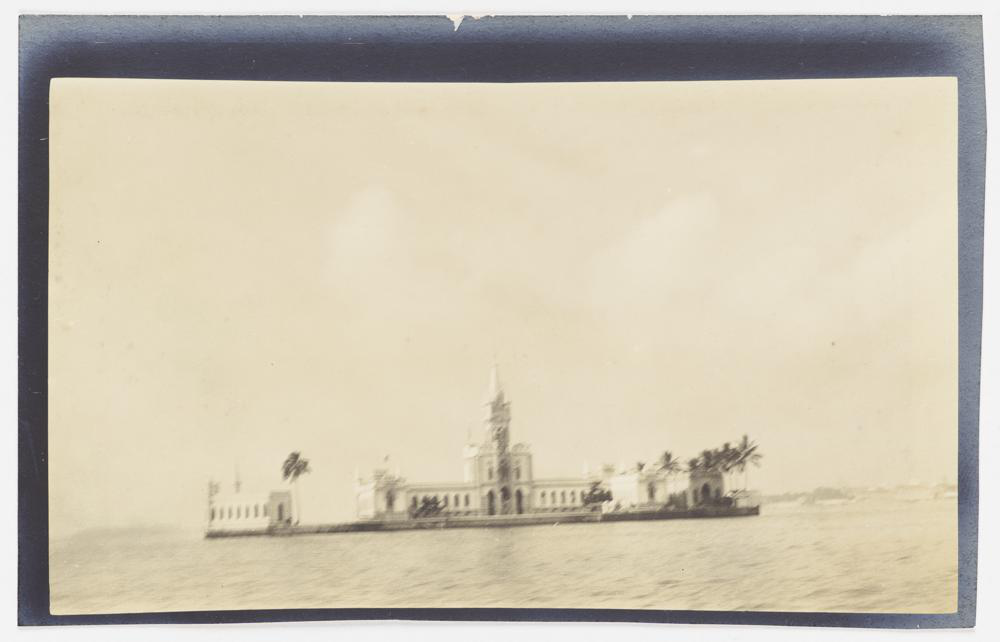

In [5]:
show(pathcol=1)

By the way, since 'pathcol' is the first keyword argument in the function definition, we don't even have to write 'pathcol='. Whatever we pass as the first argument to show( ) will be treated as pathcol:

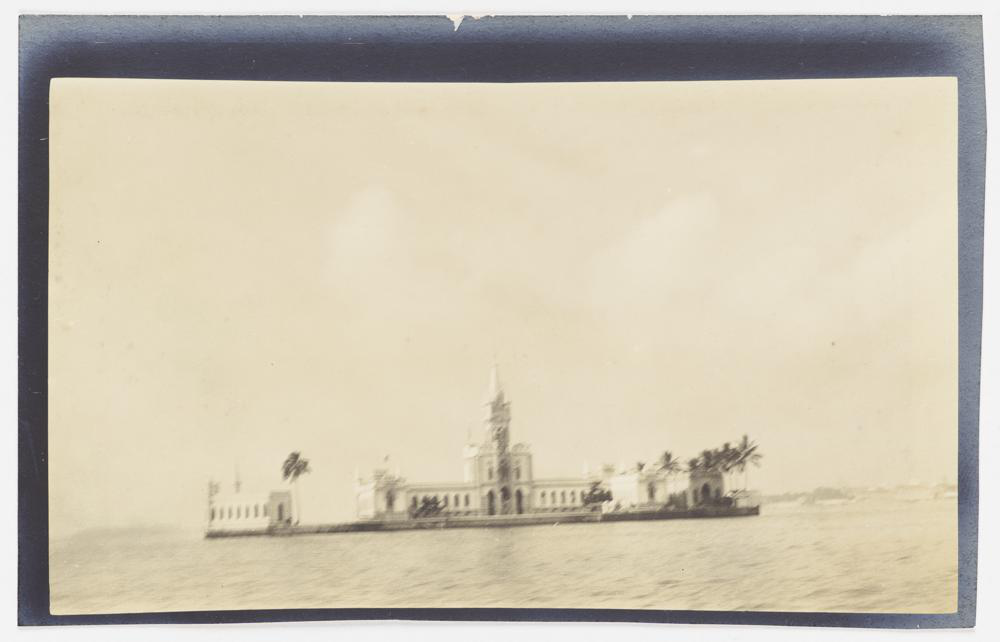

In [6]:
show(1)

The 'pathcol' argument can be used in combination with the slicing and indexing operations of pandas to display any subset of the data we wish:

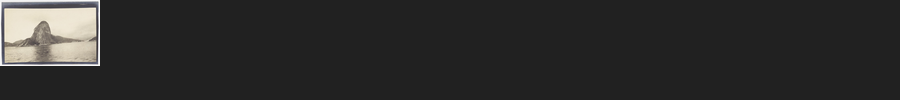

In [7]:
show(df.path[df["Source ID"]=='001AAN005121'])

### xcol and ascending

By default, show( ) displays images by their dataframe ordering, whatever it is at the time of attachment. But we can override this behavior using 'xcol'. Whatever column we assign to 'xcol' will be used to sort the images, and we can invert the ordering using 'ascending', which is False by default.  

In [ ]:
show(xcol='brightness',ascending=True)

### xdomain

It's always possible to pass pandas-sliced data to any ivpy function, but we can also use ivpy itself to subset our data. If we assign to 'xdomain' a tuple of the form (left bound, right bound), it will only display data within those bounds. Of course, we have to assign 'xcol' as well, or else it won't know which column to use.

In [ ]:
show(xcol='brightness',ascending=True,xdomain=(0.7,0.8))

### thumb

Thus far, we've been allowing show( ) to plot images using the default thumbnail size, 100px. But the user can always override the default with 'thumb'. 

In [ ]:
show(thumb=16)

### sample

If we have a very large dataset, we may want to look at a random sample of the data before trying to explore everything. The user can assign an integer to 'sample', and show( ) will display a random sample of that size.

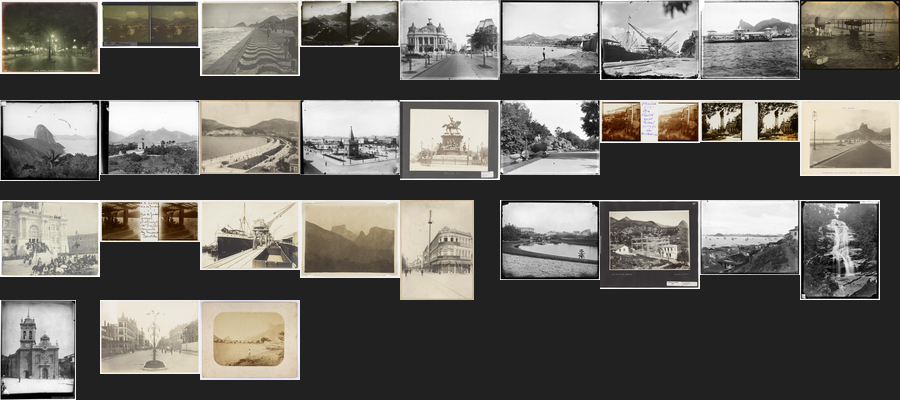

In [11]:
show(sample=30)

### idx

There will be situations where we see an image in a plot and want to trace it back to the metadata. Let's say we produce the following plot:

In [ ]:
show(xcol='brightness',xdomain=(0.7,0.75))

Let's say we want to check why the 4th and 5th images in the top row look to be the same. We presently have no great way to find that image in the data once it's plotted. This is where 'idx' comes in. If we set 'idx' to 'True', it will print the dataframe index of each image in the upper left corner:

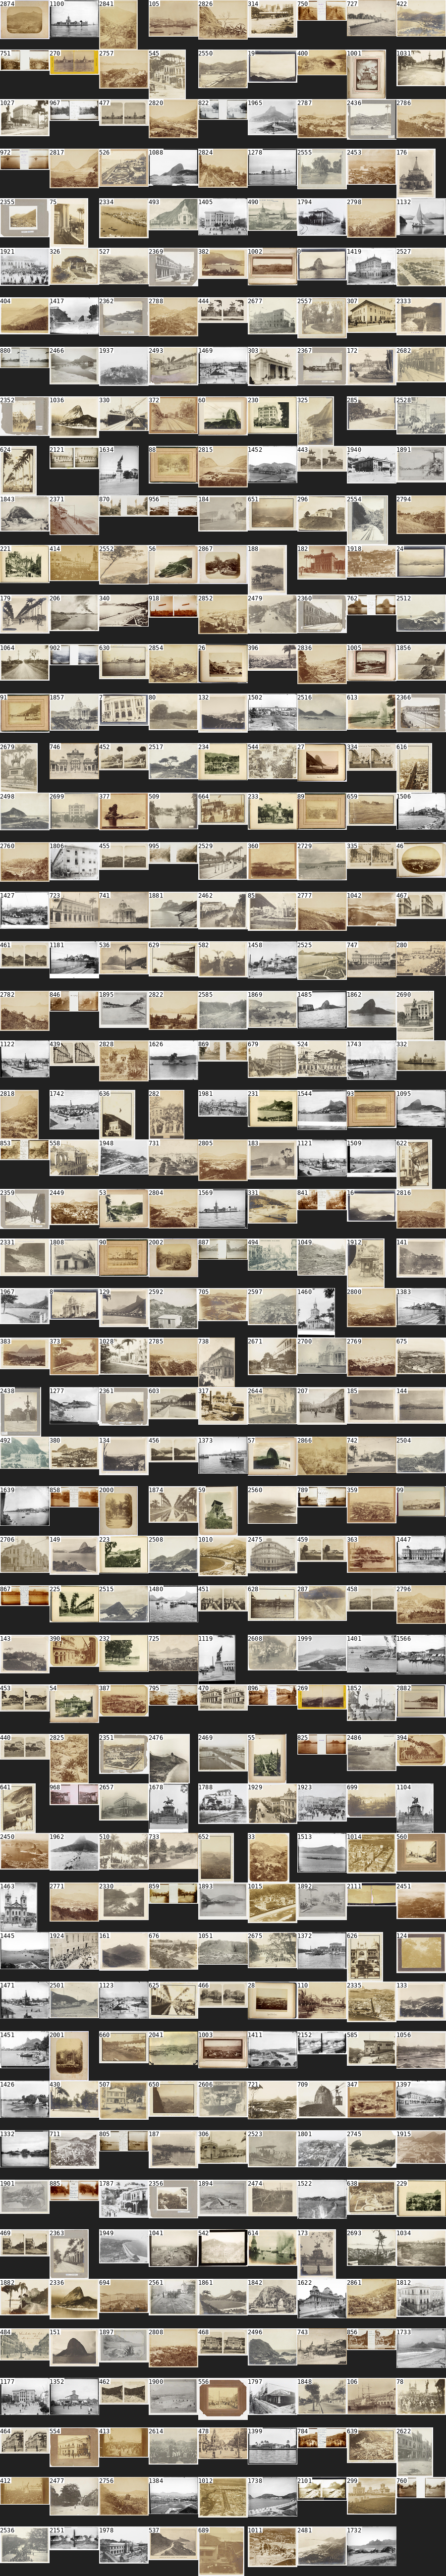

In [13]:
show(xcol='brightness',xdomain=(0.7,0.75),idx=True)

Okay, we now know the indices. Let's look at the filenames:

In [ ]:
df.filename.loc[428]

In [ ]:
df.filename.loc[459]

They are different files, but appear to be the very same images. Maybe a data error?

### bg

Images are plotted by default onto a backing canvas that matches the color specified in the ivpy style file ('style/custom.css' which you may or may not be using right now). But the user can set the background to whatever they like using 'bg'. The 'bg' argument accepts color words like 'black', 'white', 'red'; RGB triplets, and strings specifying hex or other color codes. Anything supported by the Python Imaging Library is acceptable.

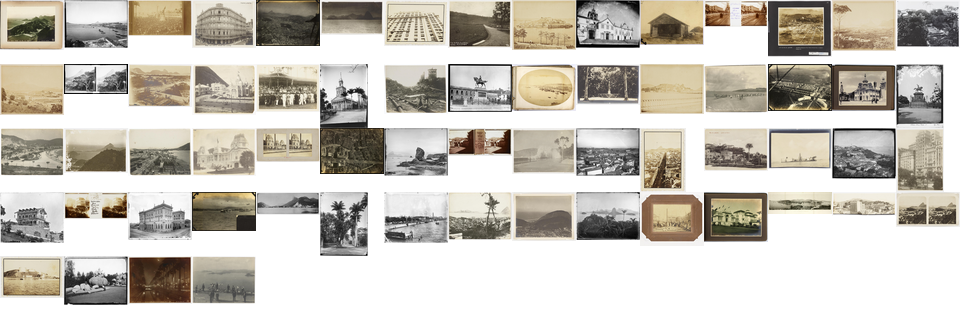

In [14]:
show(sample=64,thumb=64,bg="white")

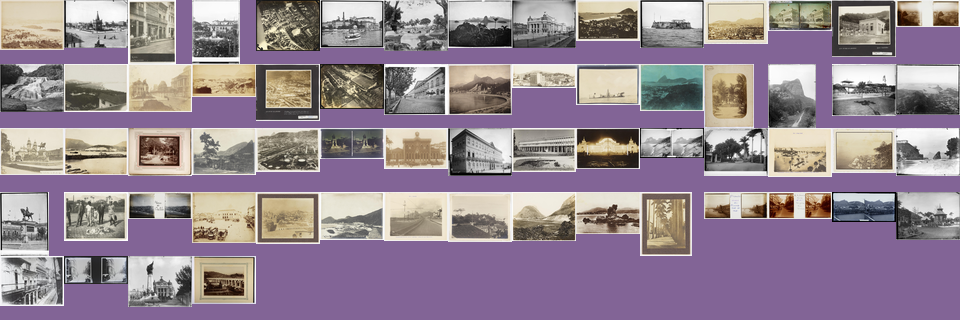

In [15]:
show(sample=64,thumb=64,bg=(130,100,150))

In [ ]:
show(sample=64,thumb=64,bg="#fff888")

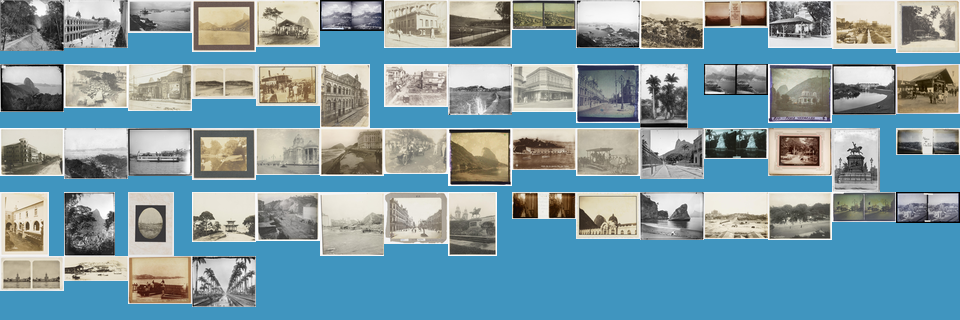

In [16]:
show(sample=64,thumb=64,bg="hsl(200,50%,50%)")